Status code: 200
id: 43351988	status: 200
id: 43347662	status: 200
id: 43353240	status: 200
id: 43309109	status: 200
id: 43349214	status: 200


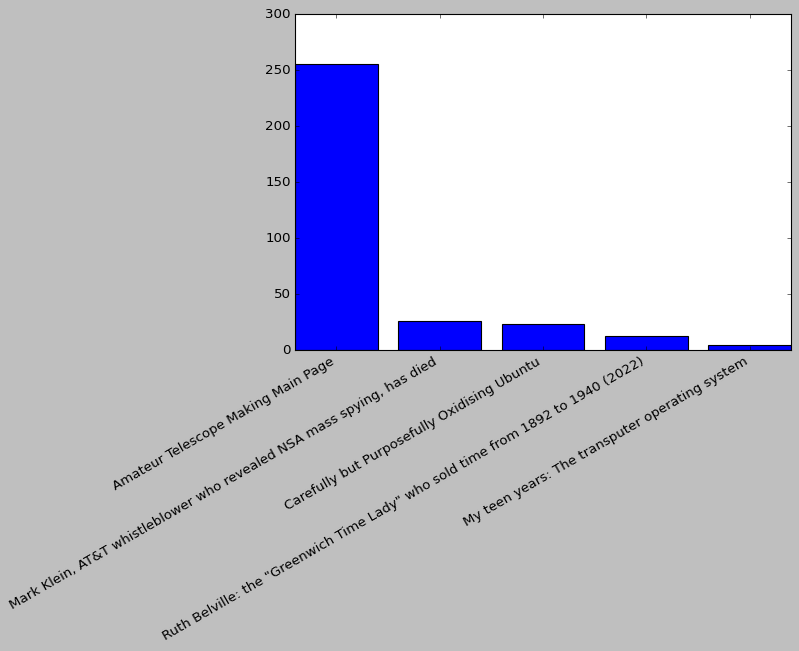

In [35]:
import matplotlib.pyplot as plt
import requests
import json
from operator import itemgetter

url ="https://hacker-news.firebaseio.com/v0/topstories.json"

r = requests.get(url)

print(f"Status code: {r.status_code}")

submission_ids = r.json()

titles, comments = [], []

submission_dicts = []

for submission_id in submission_ids[:5]:
    url = f"https://hacker-news.firebaseio.com/v0/item/{submission_id}.json"
    r= requests.get(url)
    print(f"id: {submission_id}\tstatus: {r.status_code}")
    response_dict = r.json()
    submission_dict = {
        'title': response_dict['title'],
        'hn_link': f"https//news.ycombinator.com/item?id={submission_id}",
        'comments': response_dict['descendants'] 
    }
    submission_dicts.append(submission_dict)
    titles.append(response_dict['title'])
    comments.append(response_dict['descendants'])
    
plt.style.use("classic")
fig, ax = plt.subplots()
ax.bar(titles, sorted(comments, reverse=True))
fig.autofmt_xdate()
plt.show()